<a href="https://colab.research.google.com/github/Hemant10HM/FDS-Assignment-24mcs004/blob/main/FDS_Hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt



In [ ]:
#generate a large amout of data
population = np.random.normal(loc=50 ,scale=10 ,size=100000)


In [ ]:
population

array([45.76904786, 37.35967258, 55.19081393, ..., 55.19694083,
       50.14050513, 43.67414852])

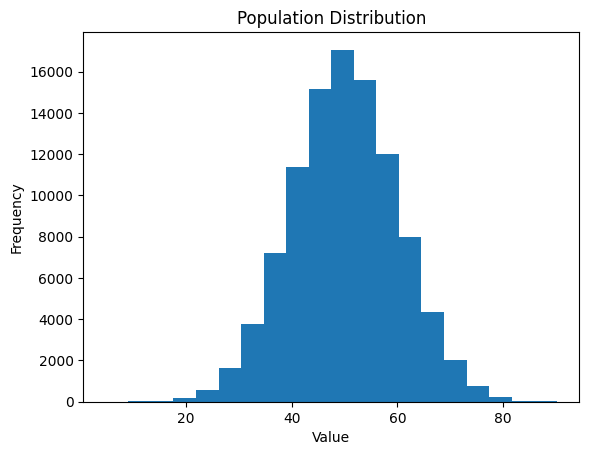

In [ ]:
plt.hist(population,bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Population Distribution')
plt.show()

In [ ]:
#function to perform uniform sampling

def uniform_sampling(population,sample_size):
    indices = np.random.choice(len(population),sample_size,replace=False)
    sample = population[indices]
    return sample

In [ ]:
sample_size = 100
sample = uniform_sampling(population,sample_size)
sample

array([40.85207736, 25.02245159, 42.83872145, 47.30956971, 51.57144178,
       49.49640952, 54.14143924, 39.10863564, 33.66411677, 50.15084693,
       72.11882842, 49.73316617, 43.25597319, 36.43835531, 52.35092729,
       57.52012294, 41.24092014, 54.34642755, 53.97084369, 24.85184151,
       54.92513564, 74.45200283, 32.65013351, 34.67008501, 58.14525863,
       47.11343299, 44.72313369, 43.46850992, 60.2947259 , 44.60274242,
       38.87075289, 54.37568419, 49.94533953, 61.48218941, 53.53064575,
       38.88239953, 39.50969499, 42.8242923 , 52.23174351, 63.28318395,
       57.48487794, 55.92696184, 48.92945223, 40.01906663, 44.72548753,
       46.7711216 , 58.09850931, 44.17543478, 51.52383389, 49.61064897,
       42.58234046, 45.73866793, 35.83561326, 46.5254705 , 31.39747053,
       52.83369361, 56.68312178, 73.79706611, 79.16017031, 49.65278496,
       43.87753972, 51.36873576, 60.50461611, 55.73476117, 40.87002349,
       59.14065231, 38.66857381, 56.87300626, 48.98720483, 47.99

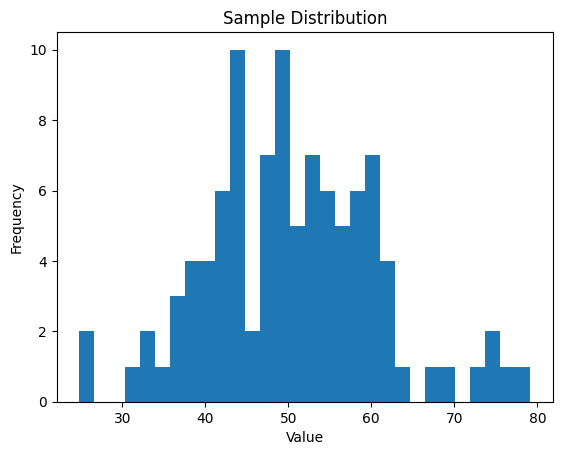

In [ ]:
plt.hist(sample,bins=30)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Sample Distribution')
plt.show()

In [ ]:
sample_mean = np.mean(sample)
sample_std = np.std(sample ,ddof=1)
sample_size = len(sample)
print(f'Sample Size: {sample_size}')
print(f'Sample Mean: {sample_mean}')
print(f'Sample Standard Deviation: {sample_std}')

Sample Size: 100
Sample Mean: 50.46586212205124
Sample Standard Deviation: 10.436537477605038


In [ ]:
#confidence Interval for mean
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1-alpha/2,df=sample_size-1)
margin_of_error = t_critical * (sample_std / np.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print(f'Confidence Interval: {confidence_interval}')

#2 Hypothesis Testing (one-sample t-test)
#Null Hypothesis : mean of population is 50
hypothesis_mean = 50
t_statistic, p_value = stats.ttest_1samp(sample,hypothesis_mean)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')


Confidence Interval: (48.39502666423928, 52.5366975798632)
T-statistic: 0.446376131021327
P-value: 0.6563004153366334


Fail to reject the null hypothesis


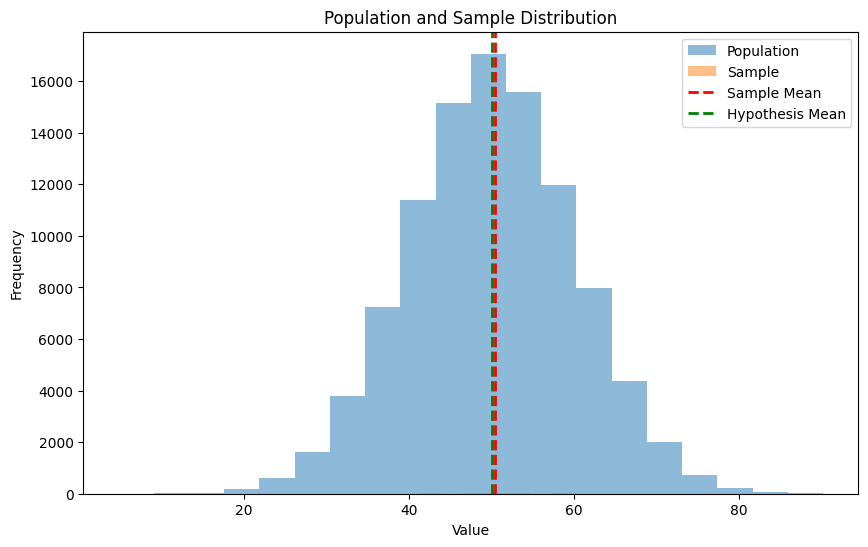

In [ ]:
if p_value < alpha:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

plt.figure(figsize=(10,6))
plt.hist(population,bins=20,alpha=0.5,label='Population')
plt.hist(sample,bins=20,alpha=0.5,label='Sample')
plt.axvline(sample_mean,color='red',linestyle='dashed',linewidth=2,label='Sample Mean')
plt.axvline(hypothesis_mean,color='green',linestyle='dashed',linewidth=2,label='Hypothesis Mean')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Population and Sample Distribution')
plt.legend()
plt.show()